<p style="text-align:right;">
<img src="https://github.com/gmdias57/SwanConsulting2/blob/main/TimberTech.png?raw=true"
     style="float: center; margin-right: 10px;"
     width="200"
     />
</p>
<h1 style="text-align: center;">Swan Consulting</h1>
<h2 style="text-align: center;">Predicting Churners</h2>
<h3 style="text-align: center;">By Timber Tech</h3>
<h4 style="text-align: center;">Georgia, Iqra, Zach</h4>

## **1. Exploratory Data Analysis**


This notebook aims to explore the demographic characteristics of customers who have churned in the Swan Consulting customer dataset. By analysing demographic variables such as age, gender, location, and other relevant factors, we can gain insights into the profile of customers who are more likely to churn. This information is valuable for identifying target segments, understanding customer behavior, and devising retention strategies to reduce churn rates.

### **1.1 Importing the packages and data**

In [6]:
# Getting imports

import pandas as pd
import numpy as np

import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler, RobustScaler, MinMaxScaler

In [7]:
# Reading the file and creating a copy to work from

swan_og = pd.read_excel("1 - Project Data.xlsx")
swan = swan_og.copy()

### **1.2 Data Cleaning**

It is essential to clean the data to ensure consistency and accuracy. Data cleaning involves tasks such as handling null values. By cleaning the data upfront, we can minimise the risk of biased results with our model and ensure that our analysis is based on reliable data.

In [8]:
# Dropping the columns that are the same value for every column

swan.drop(columns=['Count', 'Country', 'State'], inplace = True)

In [9]:
swan.head()

,CustomerID,City,Zip Code,Lat Long,Latitude,Longitude,Gender,Senior Citizen,Partner,Dependents,...,Streaming TV,Streaming Movies,Contract,Paperless Billing,Payment Method,Monthly Charges,Total Charges,Churn Label,Churn Value,Churn Reason
0,3668-QPYBK,Los Angeles,90003,"33.964131, -118.272783",33.964131,-118.272783,Male,No,No,No,...,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes,1,Competitor made better offer
1,9237-HQITU,Los Angeles,90005,"34.059281, -118.30742",34.059281,-118.307420,Female,No,No,Yes,...,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes,1,Moved
2,9305-CDSKC,Los Angeles,90006,"34.048013, -118.293953",34.048013,-118.293953,Female,No,No,Yes,...,Yes,Yes,Month-to-month,Yes,Electronic check,99.65,820.5,Yes,1,Moved
3,7892-POOKP,Los Angeles,90010,"34.062125, -118.315709",34.062125,-118.315709,Female,No,Yes,Yes,...,Yes,Yes,Month-to-month,Yes,Electronic check,104.80,3046.05,Yes,1,Moved
4,0280-XJGEX,Los Angeles,90015,"34.039224, -118.266293",34.039224,-118.266293,Male,No,No,Yes,...,Yes,Yes,Month-to-month,Yes,Bank transfer (automatic),103.70,5036.3,Yes,1,Competitor had better devices


In [10]:
# Checking for nulls in the data.
# There is 5174 nulls in 'Churn Reason' because these customers have not churned.

swan.isnull().sum()

CustomerID              0
City                    0
Zip Code                0
Lat Long                0
Latitude                0
Longitude               0
Gender                  0
Senior Citizen          0
Partner                 0
Dependents              0
Tenure Months           0
Phone Service           0
Multiple Lines          0
Internet Service        0
Online Security         0
Online Backup           0
Device Protection       0
Tech Support            0
Streaming TV            0
Streaming Movies        0
Contract                0
Paperless Billing       0
Payment Method          0
Monthly Charges         0
Total Charges           0
Churn Label             0
Churn Value             0
Churn Reason         5174
dtype: int64

In [11]:
# Some of the data in 'Total Charges' is blank, removing this from the dataframe, and changing the datatype to integer.

swan = swan.drop(swan[swan['Total Charges'] == ' '].index)
swan['Total Charges'].astype('int')

0        108
1        151
2        820
3       3046
4       5036
        ... 
7038    1419
7039    1990
7040    7362
7041     346
7042    6844
Name: Total Charges, Length: 7032, dtype: int64



To facilitate analysis, we group the 'Churn Reason' variable into three distinct categories: reasons related to the product, swan services, or competitor services. This simplifies the analysis process by consolidating similar reasons into broader categories, making it easier to identify common themes or factors contributing to customer churn. By grouping the churn reasons, we can focus our analysis on understanding the main drivers of churn and developing targeted strategies to address them.

In [12]:
swan['Churn Reason'].value_counts()

Churn Reason
Attitude of support person                   192
Competitor offered higher download speeds    189
Competitor offered more data                 162
Don't know                                   154
Competitor made better offer                 140
Attitude of service provider                 135
Competitor had better devices                130
Network reliability                          103
Product dissatisfaction                      102
Price too high                                98
Service dissatisfaction                       89
Lack of self-service on Website               88
Extra data charges                            57
Moved                                         53
Limited range of services                     44
Long distance charges                         44
Lack of affordable download/upload speed      44
Poor expertise of phone support               20
Poor expertise of online support              19
Deceased                                       6
Name: c

In [35]:
# Creating new variables to group Churn reasons together

products = ['Product dissatisfaction', 'Network reliability', 'Lack of self-service on Website', 'Limited range of services', 'Long distance charges', 'Lack of affordable download/upload speed' ]
swan_services = ['Attitude of support person', 'Attitude of service provider',   'Price too high', 'Service dissatisfaction',  'Extra data charges', 'Poor expertise of phone support', 'Poor expertise of online support']
competitor_services = ['Competitor offered higher download speeds', 'Competitor offered more data', 'Competitor made better offer', 'Competitor had better devices']

def churn_reason(reason):
    if reason in products:
        return 'Issue with products'
    elif reason in swan_services:
        return 'Issue with Swan Services'
    elif reason in competitor_services:
        return 'Competitor offered better services'
    else:
        return 'Other'

swan['Churn Category'] = swan['Churn Reason'].apply(churn_reason)

In [14]:
# Creating a dataframe with just the details of customers who churned

churners = swan[swan['Churn Value'] == 1]
len(churners)

non_churners = swan[swan['Churn Value'] == 0]

### **1.2 - Barplots of Churners and Non-Churners**

Bar plots to visualise the relationship between categorical variables. In this section, we use bar plots to explore the distribution of two variables, City and Gender, across the dataset. 

In [36]:
# Creating a dataframe the counts of each city, then plotting this

city_counts_all = pd.DataFrame(swan.City.value_counts()).reset_index()
city_counts_churn = pd.DataFrame(churners.City.value_counts()).reset_index()

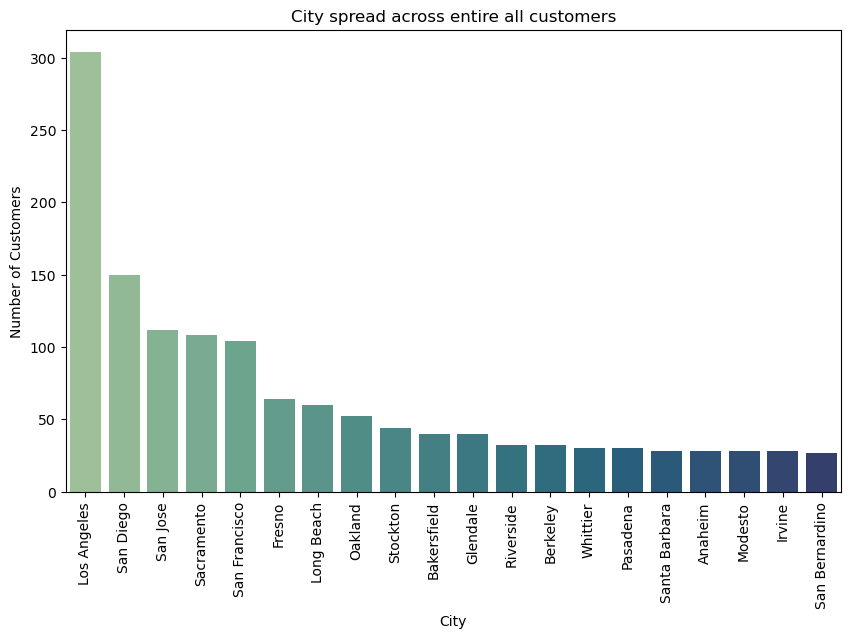

<Figure size 640x480 with 0 Axes>

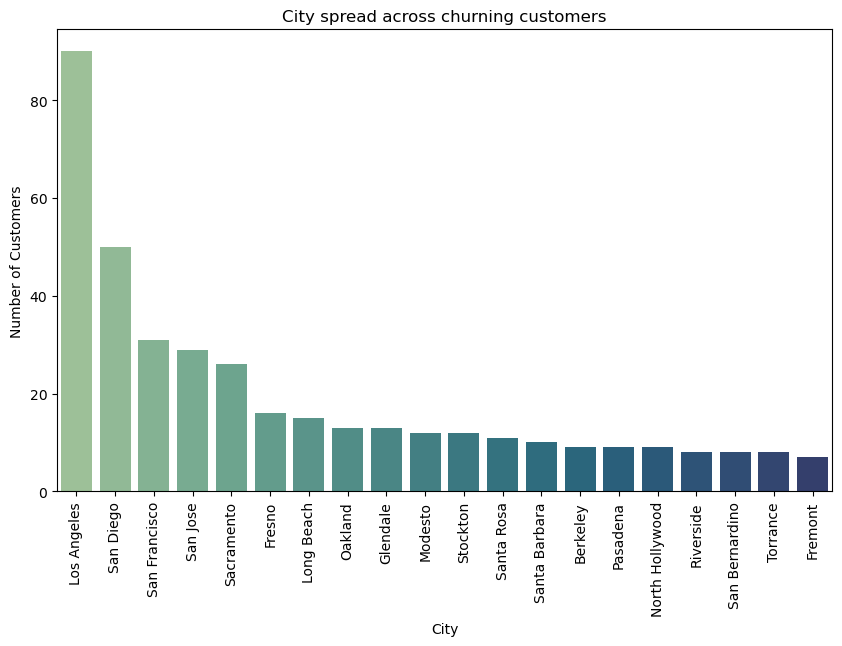

In [16]:
# Barplot to show the different citites of all customers vs. churning customers
plt.figure(figsize=(10, 6))

sns.barplot(x = 'City', y = 'count', data = city_counts_all.head(20), hue='City',
            palette='crest', dodge=False)
plt.xticks(rotation = 90)
plt.title('City spread across entire all customers')
plt.ylabel('Number of Customers') 
plt.legend([], frameon=False)
plt.show()


plt.clf()
plt.figure(figsize=(10, 6))

sns.barplot(x = 'City', y = 'count', data = city_counts_churn.head(20), hue='City', 
            palette='crest', dodge=False)
plt.xticks(rotation = 90)
plt.title('City spread across churning customers')
plt.ylabel('Number of Customers') 
plt.legend([], frameon=False)
plt.show()

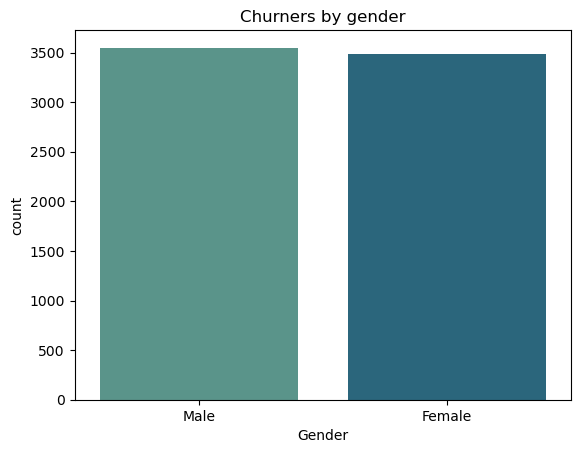

In [17]:
# Viewing churners by gender

sns.countplot(x='Gender', data=swan, palette='crest')
plt.title('Churners by gender')
plt.show()

### **1.3 - Pie Charts of Churners and Non-Churners**

Pie charts can be used to visualize the composition of the variables, making them useful for comparing proportions between different groups, by churners and non-churners. By representing each category in a pie chart, we can easily see the relative sizes of each group and identify any significant differences in distribution. This allows us to gain insights into patterns or trends within the data and understand how churn behavior varies across different categories. 

In [37]:
# Grouping the columns

high_diff = ['Online Security', 'Online Backup', 'Device Protection', 'Tech Support','Streaming TV', 'Streaming Movies']
yes_no_columns=['Senior Citizen', 'Partner', 'Dependents', 'Phone Service', 'Multiple Lines',
                    'Online Security', 'Online Backup' 'Device Protection',
                    'Tech Support', 'Streaming TV', 'Streaming Movies', 'Paperless Billing']

<Figure size 640x480 with 0 Axes>

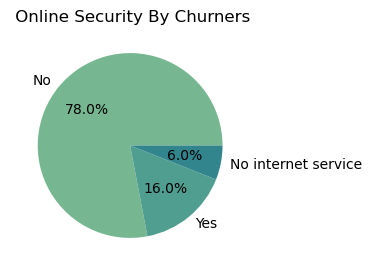

<Figure size 640x480 with 0 Axes>

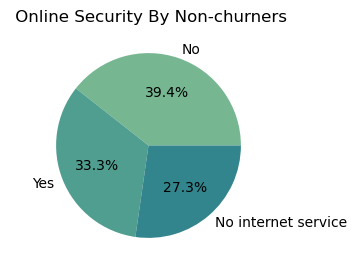

<Figure size 640x480 with 0 Axes>

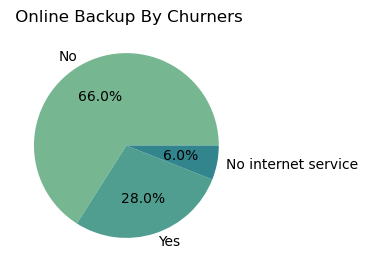

<Figure size 640x480 with 0 Axes>

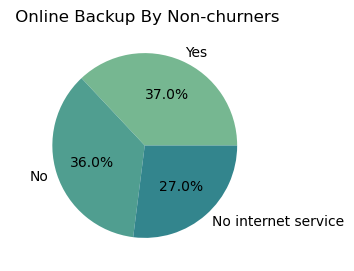

<Figure size 640x480 with 0 Axes>

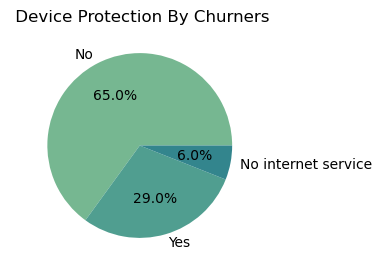

<Figure size 640x480 with 0 Axes>

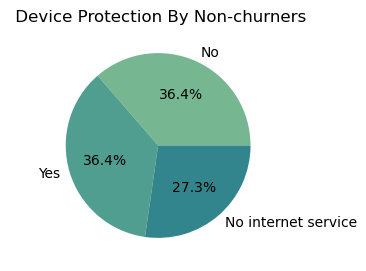

<Figure size 640x480 with 0 Axes>

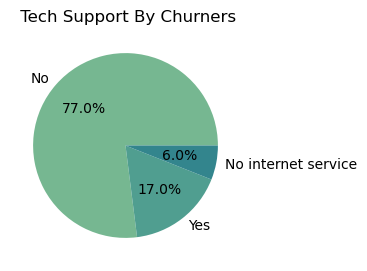

<Figure size 640x480 with 0 Axes>

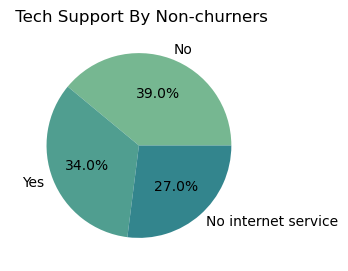

<Figure size 640x480 with 0 Axes>

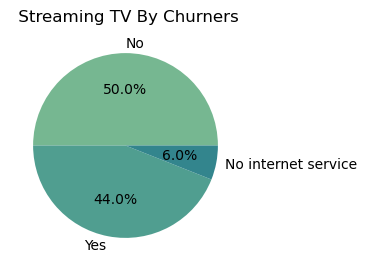

<Figure size 640x480 with 0 Axes>

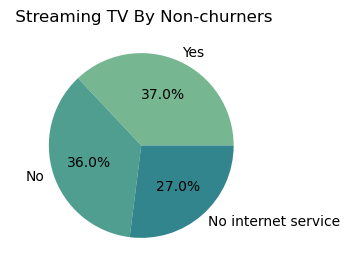

<Figure size 640x480 with 0 Axes>

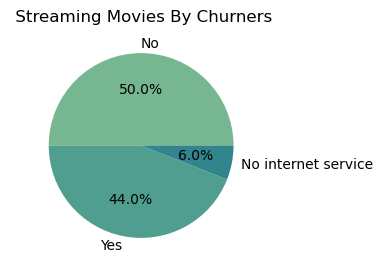

<Figure size 640x480 with 0 Axes>

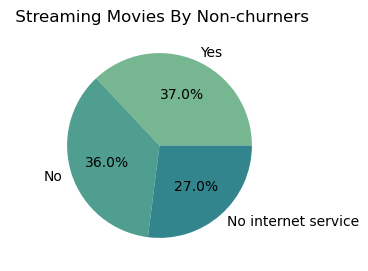

In [19]:
# Piecharts to compare churners again non-churners across different variables.

palette = sns.color_palette("crest", n_colors=5) 
for col in high_diff:
    plt.clf()
    plt.figure(figsize = (10, 3))
    label = churners[col].value_counts(normalize = True).index
    size = round(churners[col].value_counts(normalize = True), 2).values
    plt.pie(size, labels = label, autopct='%1.1f%%', colors=palette)
    plt.title(f' {col} By Churners')
    plt.show()

    plt.clf()
    plt.figure(figsize = (10, 3))
    label = non_churners[col].value_counts(normalize = True).index
    size = round(non_churners[col].value_counts(normalize = True), 2).values
    plt.pie(size, labels = label, autopct='%1.1f%%', colors=palette)
    plt.title(f' {col} By Non-churners')
    plt.show()


In [22]:
# Comparing the above to the trend for the entire churner group

churn_cat_count = pd.DataFrame(swan['Churn Category'].value_counts()).reset_index()
churn_cat_count.head()
churn_cat_count.columns

Index(['Churn Category', 'count'], dtype='object')

In [23]:
labels = churn_cat_count['Churn Category']
sizes = churn_cat_count['count']

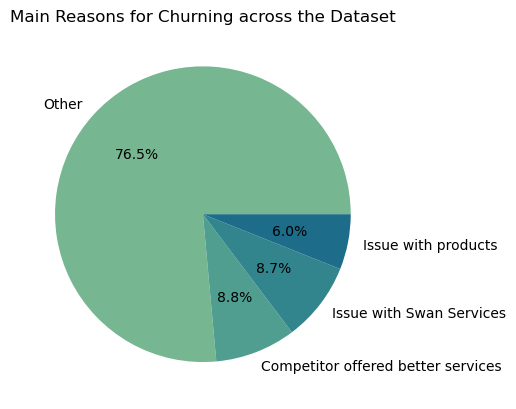

In [38]:
# Piechart to show the main reasons for chruning

palette = sns.color_palette("crest", n_colors=5) 
plt.pie(sizes, labels=labels, autopct='%1.1f%%', colors=palette)
plt.title('Main Reasons for Churning across the Dataset')
plt.show()

### **1.4 - Boxplots to shows distribution**


Boxplots are used here to help identify outliers in a dataset. They provide a summary of the distribution of a numerical variable, including measures such as the median, quartiles, and potential outliers. This helps us assess the impact of outliers on our analysis and decide how to handle them.


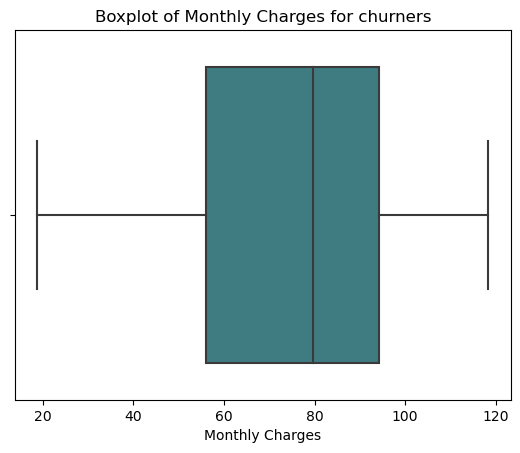

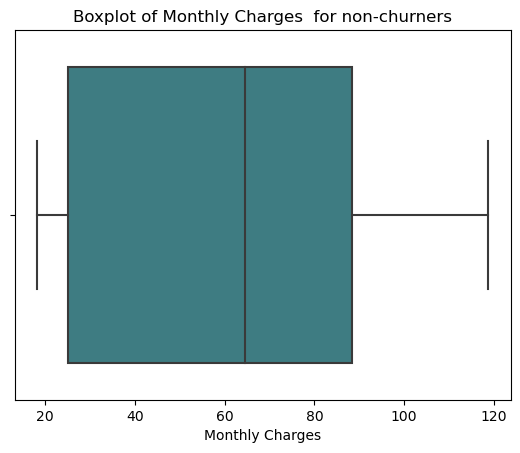

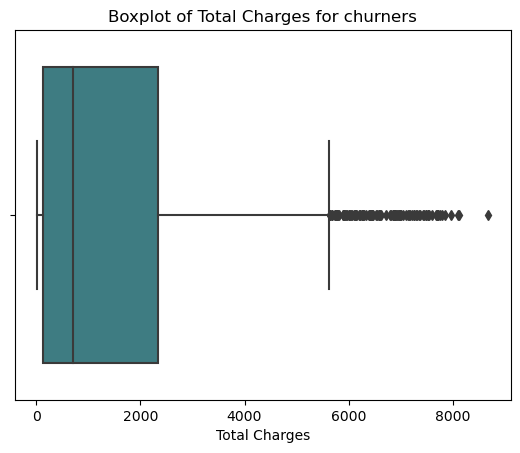

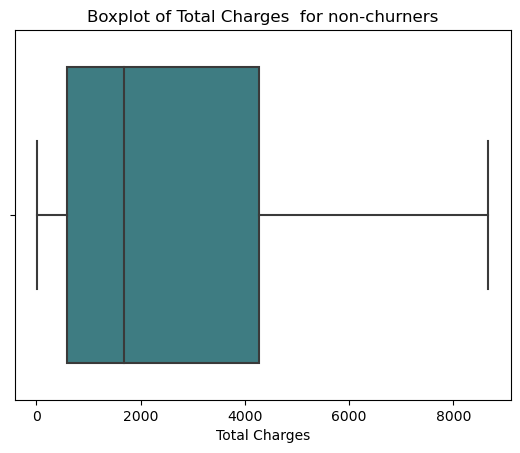

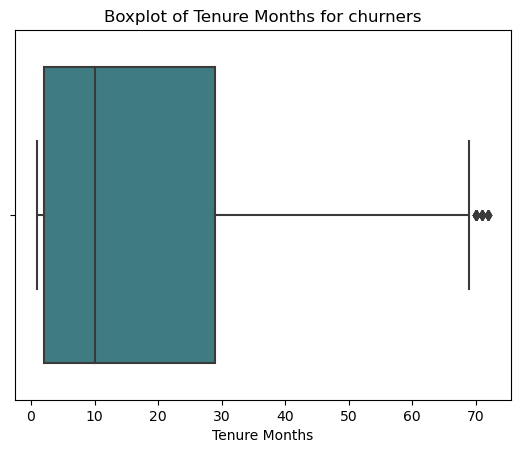

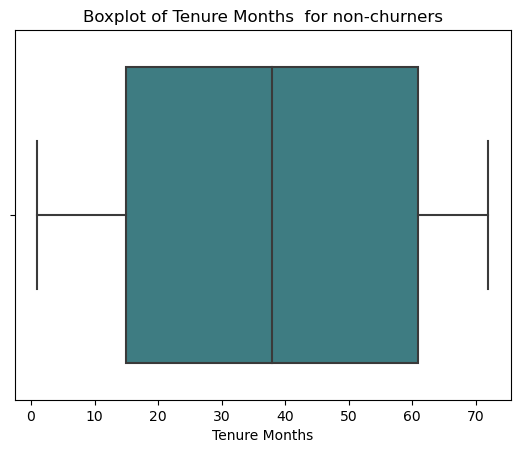

In [26]:
# Boxplots to show variations of the churners

num_cols = [ 'Monthly Charges', 'Total Charges', 'Tenure Months']
palette = "crest" 
for col in num_cols: 
    plt.clf()
    sns.boxplot(data = churners, x = col, palette=palette)
    plt.title(f'Boxplot of {col} for churners' )
    plt.show()

    plt.clf()
    sns.boxplot(data = non_churners, x = col, palette=palette)
    plt.title(f'Boxplot of {col}  for non-churners' )
    plt.show()

### **1.5 Kernel Density Graphs to show the distribution**

Kernel Density graphs are useful for visualising the distribution of data in a dataset. They provide a smoothed representation of the data distribution. This allows us to visually assess the shape and spread of the data, including modes present.

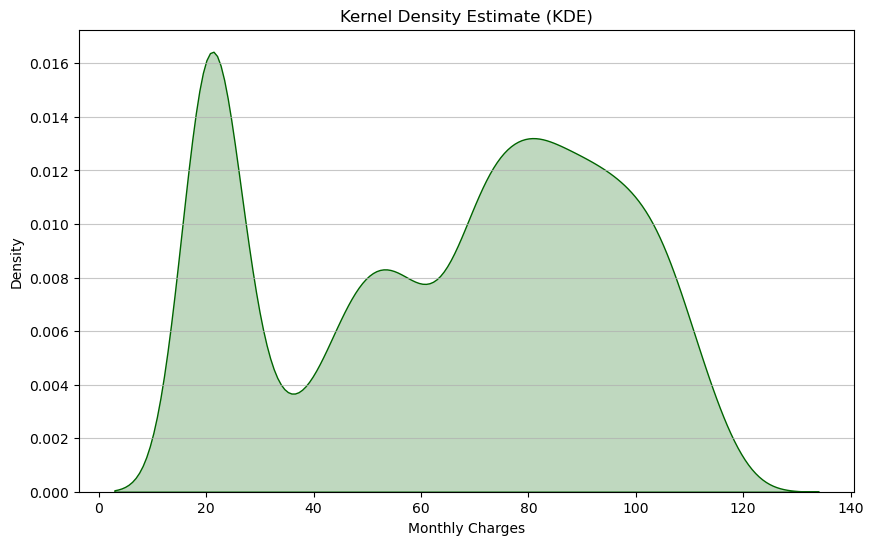

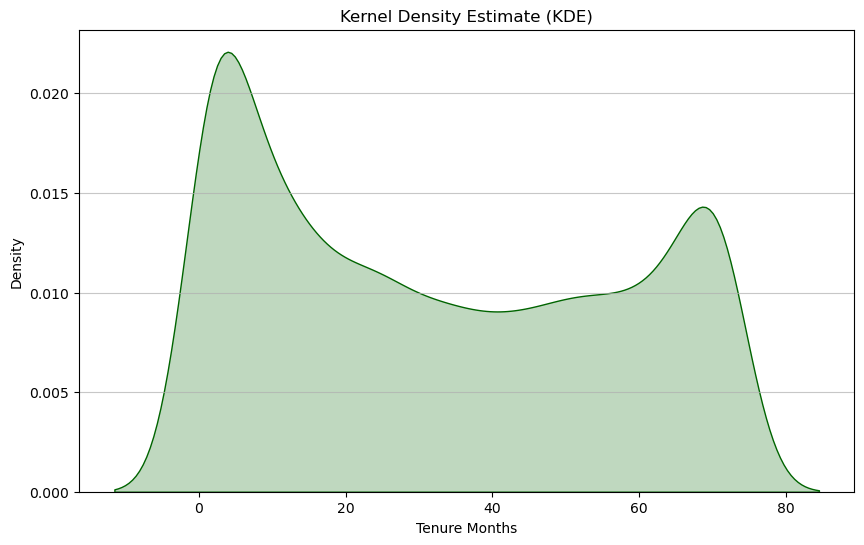

In [34]:
num_cols = ['Monthly Charges', 'Tenure Months']
for col in num_cols :

    plt.figure(figsize=(10, 6))
    sns.kdeplot(data=swan,
                x= col,
            color='darkgreen',
            fill=True)
    plt.title('Kernel Density Estimate (KDE)')
    plt.ylabel('Density')
    plt.grid(axis='y', alpha=0.7)
    plt.show()